# Module Assessment

### Setup

Import required packages for effective operation of notebook

In [2]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# Listing data files
import os


### Assessment Tasks

1. Write a function titled get_data() to download previous 5 days for the FAANG stocks
2. Plot the data for each stock
3. Write faang.py script to perform task 1 and 2
4. Create GitHub Actions workflow to run script faang.yml every Saturday morninng

#### Problem 1. Funtion Creation

To create the 'get_data' function, '''yf.download''' will be used, with certain parameters specified, to align with the 5 day look back.

In [3]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 5 lines of the results
get_data.head()

/tmp/ipykernel_1824/3428256576.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-11 14:30:00+00:00  274.100006  248.467804  289.459991  622.369995   
2025-11-11 15:30:00+00:00  272.500000  247.580002  289.149994  622.369995   
2025-11-11 16:30:00+00:00  273.315002  248.268295  290.019989  623.380005   
2025-11-11 17:30:00+00:00  274.480011  249.326004  289.790009  624.130005   
2025-11-11 18:30:00+00:00  275.320007  249.369995  290.589996  625.020020   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-11 14:30:00+00:00  112.350998  274.739990  249.629898  291.694000   
2025-11-11 15:30:00+00:00  112.506004  274.346100  248.960007  290.355011   
2025-11-11 16:30:00+00:00  112.418991  273.614990  248.479996  290.600006   
2025-11-11 17:30:00+00:00  113.068993  274.700012  249.389999  290.200012   
2025-11-11 18:30:00+00:00  113.275002  275.660004  249.749893  291.690002   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-11 14:30:00+00:00  629.559998  113.568008  ...  269.809998   
2025-11-11 15:30:00+00:00  623.960022  112.892006  ...  274.100006   
2025-11-11 16:30:00+00:00  625.599976  112.558998  ...  272.510010   
2025-11-11 17:30:00+00:00  624.649902  113.199997  ...  273.329987   
2025-11-11 18:30:00+00:00  626.150024  113.599998  ...  274.489990   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-11 14:30:00+00:00  248.445007  288.200012  628.125000  111.875000   
2025-11-11 15:30:00+00:00  248.457397  289.404999  622.365112  112.332993   
2025-11-11 16:30:00+00:00  247.600006  289.179993  622.400024  112.499496   
2025-11-11 17:30:00+00:00  248.273605  290.029999  623.369995  112.406998   
2025-11-11 18:30:00+00:00  249.309998  289.799988  624.130005  113.081993   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-11-11 14:30:00+00:00  9244708  3730327  2757570  2509903  559122  
2025-11-11 15:30:00+00:00  3452496  2380534   975039  1416358  176573  
2025-11-11 16:30:00+00:00  2525614  1320221   831517   846209  181061  
2025-11-11 17:30:00+00:00  2634766  1560683   614277   657328  208729  
2025-11-11 18:30:00+00:00  3455305  1357003  1003383   783117  212113  

[5 rows x 25 columns]

Given the above code can be seen to pull the requested dates; previous 5 days with 1 hour intervals, the following code can then be used to save the information with the required naming convention.

In [4]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes

now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 11, 17, 20, 4, 56, 822208)

This now needs to be converted into a string, and can be done so using '''now.strftime'''
https://www.w3schools.com/python/python_datetime.asp

In [5]:
# Convert date and time into string specifying:
# %Y - for year
# %m - for month

now.strftime('%Y%m%d-%H%M%S')

'20251117-200456'

Merging the above 2 codes will generate the exact time the code is ran, and capture it in a string format. 

In [6]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251117-200456'

This can then be expanded to be used as the filename, along with specifying the location for the file to be saved.

In [7]:
# File location is the 'data' folder, and will be a .csv file.
'../data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'../data/20251117-200456.csv'

All can now be pulled together to save the previous 5 days for the given stocks.

In [8]:
# Save download as a .csv file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder, titling file with time stamp
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

First step is to retreive the data from the latest file in the 'data' folder. This can be done by firstly specifying the directory location (`datadir`), an then chosing the correct filename.

In [9]:
# Specify data folder as location to find the file.
datadir = './data/'

# Specify the filename, which is the same time stamp as when the data is pulled.
filename=f'{time_stamp}.csv'

The CSV file can then be pulled in and plotted.

In [10]:
# Read in the CSV file
df= pd.read_csv(datadir + filename)

#show first 5 rows
df.head()

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-11-11 14:30:00+00:00,274.1000061035156,248.46780395507812,289.4599914550781,622.3699951171875,112.35099792480469,274.739990234375,249.62989807128906,291.6940002441406,629.5599975585938,...,269.80999755859375,248.44500732421875,288.20001220703125,628.125,111.875,9244708,3730327,2757570,2509903,559122
3,2025-11-11 15:30:00+00:00,272.5,247.5800018310547,289.1499938964844,622.3699951171875,112.5060043334961,274.3460998535156,248.9600067138672,290.3550109863281,623.9600219726562,...,274.1000061035156,248.4573974609375,289.4049987792969,622.3651123046875,112.33299255371094,3452496,2380534,975039,1416358,176573
4,2025-11-11 16:30:00+00:00,273.31500244140625,248.26829528808594,290.0199890136719,623.3800048828125,112.41899108886719,273.614990234375,248.47999572753906,290.6000061035156,625.5999755859375,...,272.510009765625,247.60000610351562,289.17999267578125,622.4000244140625,112.49949645996094,2525614,1320221,831517,846209,181061


The above can be seen to have multiple column names which won't be able to be plotted. To do this, the CSV file needs to be read in, specifying the first 2 rows as the columns.

In [11]:
data_files = os.listdir('./data/')

# Show
data_files

['20251117-190927.csv',
 '20251117-200457.csv',
 '20251117-190605.csv',
 '20251117-185650.csv',
 '20251117-191009.csv']

In [12]:
# Sort the list of files.
data_files.sort(reverse=True)

# Show.
data_files[0]

'20251117-200457.csv'

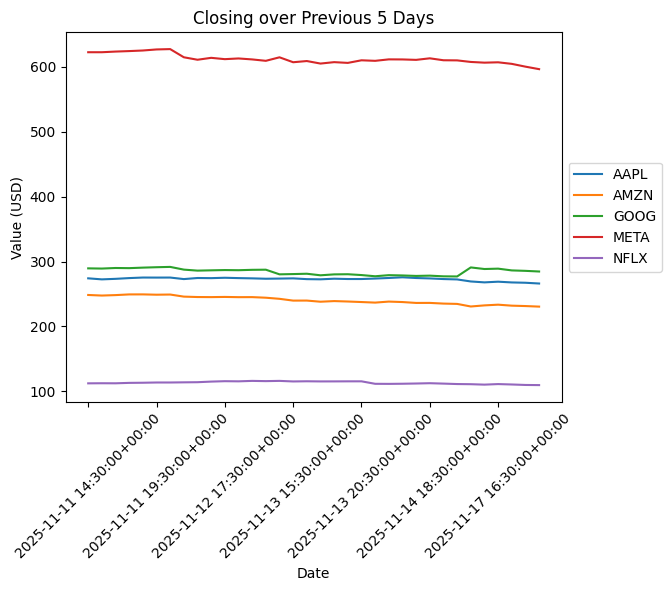

In [ ]:
# Specify first file in data_files group
latest = data_files[0]

# Read in the CSV file
# 'header=[0,1]' species the use of row 0 and 1 as the column names
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Rotate x-axis lables 45°
plt.xticks(rotation=45)

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Current date & time for plot save file
now = dt.datetime.now()

# File name.
filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save figure.
plt.savefig(filename, dpi=500)

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three code lines were copied over:
- The first to pull the 5 day, hourly data for each of the stock.
- The second line to generate a timestamp of when ran.
- The final line to save the data into the `data` folder.

To run each of these, specific packages are also needed, so these too were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.

This results in the below code.

```python

import datetime as dt

import yfinance as yf

get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

get_data.to_csv('data/' + time_stamp + '.csv')

```

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needs to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check to ensure the script functions is to allow the file have permission to execute. To do so, in the same location where the `faang.py` script is located, in the terminal `chmod u+x faang.py` was ran. This changes the script to allow the user `u` to execute `x` the script.

To ensure this worked, `ls -l faang.py` was ran in the terminal. It outputted below, confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can now be ran in the terminal by simply typing `./faang.py`.

# End